In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘data.table’ was built under R version 4.2.2”


In [2]:
strats = fread('stratified_genome_metadata.tsv')
setnames(strats, 'genome_ID', 'genome')

In [3]:
tools = c('singlem', 'metaphlan', 'motus', 'kracken', 'sourmash', 'kaiju')

In [4]:
d1 = data.table(expand.grid(tool=tools, genome=strats$genome))
d1[1:3]

tool,genome
<fct>,<fct>
singlem,GCA_019422935.1_genomic
metaphlan,GCA_019422935.1_genomic
motus,GCA_019422935.1_genomic


In [5]:
# output_singlem/opal/GCA_022615805.1_genomic.opal_report
d2 = d1[, fread(paste('output_',tool,sep='','/opal/',genome,'.opal_report')), by=list(tool,genome)]
d2[1:3]

tool,genome,tool,rank,metric,sample,value
<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,Gold standard,kingdom,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,phylum,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,class,Bray-Curtis distance,SAMPLEID,0


In [6]:
dim(d2)

[1] 131040      7

In [7]:
setnames(d2, c('tool','genome','blah','rank','metric','sample','value'))
d3 = d2[blah != 'Gold standard'][,.(tool, genome, rank, metric, value)]
d3[1:3]
dim(d3)

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.03474009
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03061224
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03061224


[1] 65520     5

In [8]:
bc = d3[metric=='Bray-Curtis distance']
dim(bc)
bc[1:10]

[1] 5040    5

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.03474009
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03061224
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03061224
singlem,GCA_019422935.1_genomic,order,Bray-Curtis distance,0.03061224
singlem,GCA_019422935.1_genomic,family,Bray-Curtis distance,0.03061224
singlem,GCA_019422935.1_genomic,genus,Bray-Curtis distance,0.03061224
singlem,GCA_019422935.1_genomic,species,Bray-Curtis distance,0.48895318
metaphlan,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.12123940
metaphlan,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.12123940


In [9]:
bc2 = merge(bc, strats, by='genome')
bc2[1:10]

genome,tool,rank,metric,value,novelty_category,taxonomy
<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.007086614,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.427756083,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.414026453,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,order,Bray-Curtis distance,0.361595174,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,family,Bray-Curtis distance,0.336468130,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,genus,Bray-Curtis distance,0.336468130,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,species,Bray-Curtis distance,0.336468130,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,kingdom,Bray-Curtis distance,0.500000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,phylum,Bray-Curtis distance,0.500000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095


In [10]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novel_orders = gsub('^','novel ',orders)
bc2[, rank := factor(rank, levels=orders)]
bc2[, novelty_category := factor(novelty_category, levels=orders)]

In [11]:
bc2[, kingdom := gsub('d__', 'novel ', gsub(';.*','',taxonomy))]
bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]
bc2[1:3]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.007086614,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.427756083,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.414026453,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


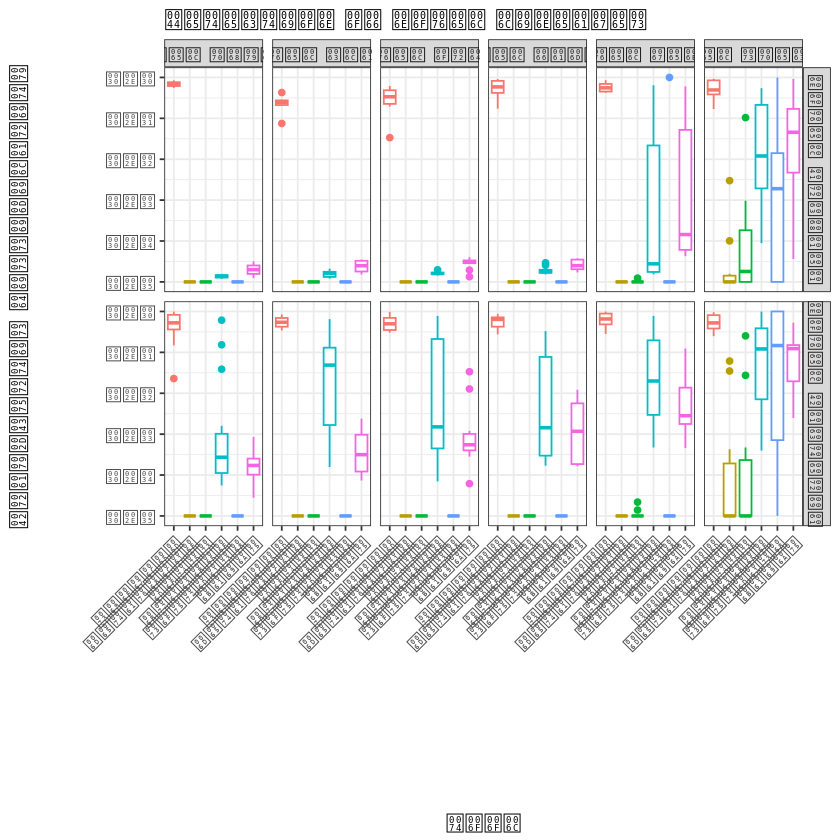

In [12]:
qplot(data=bc2[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [13]:
# stats
bc2[rank=='kingdom', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.0317972,0.02668008
metaphlan,0.4892579,0.05455144
motus,0.4840182,0.06749526
kracken,0.2875140,0.16694889
sourmash,0.4520290,0.13510029
kaiju,0.3225479,0.13138240


In [14]:
bc2[rank=='kingdom' & kingdom=='novel Archaea', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03725344,0.02898206
metaphlan,0.49230964,0.03829034
motus,0.48179037,0.06738987
kracken,0.38885219,0.15422311
sourmash,0.44760122,0.13599135
kaiju,0.36318126,0.15428623


In [15]:
bc2[rank=='kingdom' & novelty_category=='species', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.02857541,0.02218952
metaphlan,0.43554737,0.12245119
motus,0.40697384,0.14477928
kracken,0.16142000,0.12647394
sourmash,0.23717395,0.20731289
kaiju,0.14354931,0.10799276


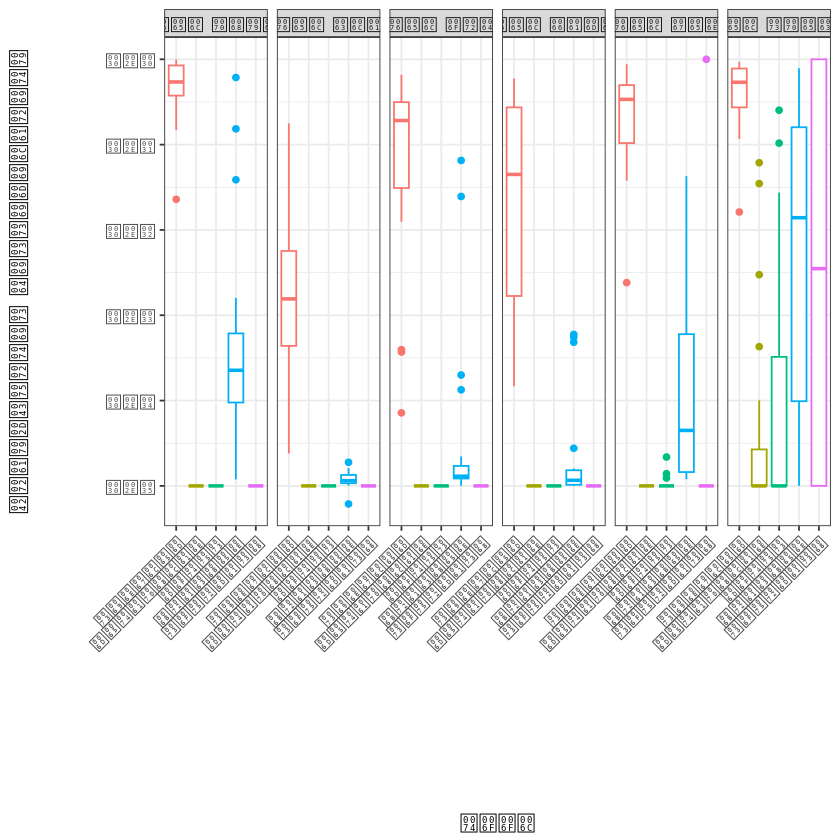

In [16]:
# What about when the rank equals the novelty category?
qplot(data=bc2[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]], ylab='Bray-Curtis dissimilarity', tool, colour=tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [17]:
# stats
bc2[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.1182850,0.12229851
metaphlan,0.4892579,0.05455144
motus,0.4840182,0.06749526
kracken,0.3929485,0.14134501
sourmash,0.4520290,0.13510029


In [18]:
bc2[tool != 'kaiju' & tool != 'singlem'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)][,.(ave=mean(ave), sd=mean(sd))]

ave,sd
<dbl>,<dbl>
0.4545634,0.099623


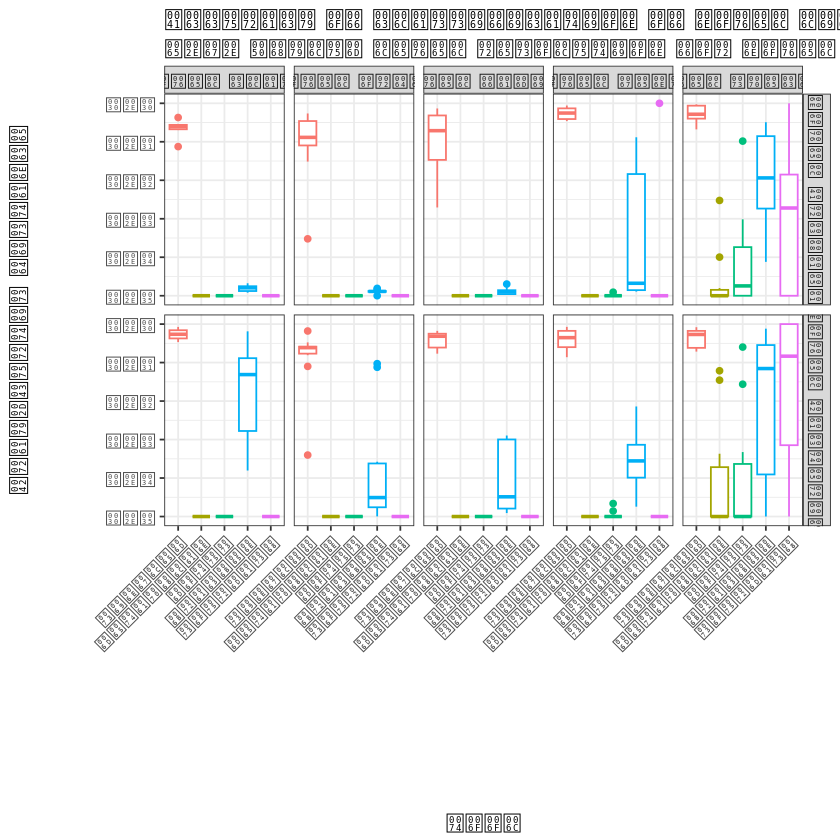

In [19]:
# What about when the rank equals one level above the novelty category?
qplot(data=bc2[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]], main='Accuracy of classification of novel lineages at 2nd highest possible resolution',  colour=tool, ylab='Bray-Curtis distance', tool, value, geom='boxplot')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+labs(subtitle='e.g. Phylum level resolution for novel orders')+theme(legend.position='none')+scale_y_reverse()

In [20]:
bc2[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.05443766,0.05892197
metaphlan,0.48710947,0.05957407
motus,0.48082190,0.07358000
kracken,0.34148739,0.16540178
sourmash,0.44243479,0.14622417


In [21]:
# Write out data for plotting benchmarks altogether
fwrite(bc2, 'bray_curtis.tsv', sep='\t')